# Etapa 2

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# A inflação dos EUA afeta o valor do dólar globalmente, inclusive em relação ao
# real.
CPI_EUA = pd.read_csv("data/CPI eua.csv")

# A taxa de juros dos EUA influencia o valor do dólar e, portanto, pode impactar
# o câmbio USD/BRL.
JUROS_EUA = pd.read_csv("data/Federal Funds Effective.csv")

# A inflação nos EUA afeta o poder de compra do dólar, o que pode influenciar
# sua taxade câmbio com o real
INFLACAO_EUA= pd.read_csv('data/Inflação eua.csv')

# A força da economia dos EUA, refletida no PIB, afeta o valor da sua moeda em
# relação a outras, incluindo o real.
PIB_EUA = pd.read_csv('data/PIB eua.csv')

# O câmbio euro/dólar pode fornecer informações sobre a força do dólar em
# relação a uma moeda forte, o que pode ser útil para prever o valor em relação
# ao real.
RELACAO_EURO_DOLAR = pd.read_csv('data/Relação euro_dolar.csv', sep=";", encoding="iso-8859-1")

# O PIB brasileiro reflete a força da economia do Brasil, que pode impactar a
# taxa de câmbio USD/BRL.
PIB_BR = pd.read_excel('data/PIB Br.xlsx')

# As reservas internacionais brasileiras podem influenciar a estabilidade e o
# valor do real frente ao dólar.
RESERVAR_INTERNACIONAIS = pd.read_csv('data/reservas internacionais.csv', sep=";", encoding="iso-8859-1")

# O risco-país pode ser um fator importante para o valor do real, já que o risco
# afeta a atratividade dos investimentos no Brasil.
RISCO_BR = pd.read_excel('data/Risco Br.xlsx')

# Esta taxa mede o valor do real ajustado pela inflação, sendo um importante
# indicador para prever a evolução da taxa de câmbio.
TAXA_CAMBIO_REAL_EFETIVA = pd.read_csv('data/Taxa Cambio Real Efetiva.csv', sep=";", encoding="iso-8859-1")

# Esta taxa mede o valor do real ajustado pela inflação, sendo um importante
# indicador para prever a evolução da taxa de câmbio.
TAXA_SELIC = pd.read_csv('data/Taxa Selic.csv', sep=";")

# Este é o dataset central, contendo o histórico do câmbio entre o dólar e o
# real
USD_BRL_HIST = pd.read_csv('data/USD_BRL Dados Históricos.csv')

# Etapa 3

In [133]:
CPI_EUA["ts"] = pd.to_datetime(CPI_EUA["DATE"])
CPI_EUA.drop(columns=["DATE"], inplace=True)
CPI_EUA.rename(columns={CPI_EUA.columns[0]: "CPI_EUA"}, inplace=True)

JUROS_EUA["ts"] = pd.to_datetime(JUROS_EUA["DATE"])
JUROS_EUA.drop(columns=["DATE"], inplace=True)
JUROS_EUA.rename(columns={JUROS_EUA.columns[0]: "JUROS_EUA"}, inplace=True)
JUROS_EUA['JUROS_EUA'] = pd.to_numeric(JUROS_EUA['JUROS_EUA'], errors='coerce')

INFLACAO_EUA["ts"] = pd.to_datetime(INFLACAO_EUA["DATE"])
INFLACAO_EUA.drop(columns=["DATE"], inplace=True)
INFLACAO_EUA.rename(columns={INFLACAO_EUA.columns[0]: "INFLACAO"}, inplace=True)

quarter_to_month = {'T1': '01', 'T2': '04', 'T3': '07', 'T4': '10'}
PIB_BR["ts"] = PIB_BR[PIB_BR.columns[0]].apply(
    lambda x: f"{x.split()[0]}-{quarter_to_month[x.split()[1]]}-01"
)
PIB_BR["ts"] = pd.to_datetime(PIB_BR["ts"])
PIB_BR["PIB_BR"] = PIB_BR[PIB_BR.columns[1]]
PIB_BR.drop(columns=PIB_BR.columns[0:2], inplace=True)

PIB_EUA["ts"] = pd.to_datetime(PIB_EUA["DATE"])
PIB_EUA.drop(columns=["DATE"], inplace=True)
PIB_EUA.rename(columns={PIB_EUA.columns[0]: "PIB_EUA"}, inplace=True)
PIB_EUA["PIB_EUA"] = PIB_EUA["PIB_EUA"] / 1000

RELACAO_EURO_DOLAR["ts"] = pd.to_datetime(RELACAO_EURO_DOLAR["Data"], format="%m/%Y", errors="coerce")
RELACAO_EURO_DOLAR.drop(columns=["Data"], inplace=True)
RELACAO_EURO_DOLAR.rename(columns={RELACAO_EURO_DOLAR.columns[0]: "REL_EURO_DOLAR"}, inplace=True)
RELACAO_EURO_DOLAR['REL_EURO_DOLAR'] = RELACAO_EURO_DOLAR['REL_EURO_DOLAR'].str.replace(',', '.', regex=False)
RELACAO_EURO_DOLAR['REL_EURO_DOLAR'] = pd.to_numeric(RELACAO_EURO_DOLAR['REL_EURO_DOLAR'], errors='coerce')

RESERVAR_INTERNACIONAIS["ts"] = pd.to_datetime(RESERVAR_INTERNACIONAIS["Data"], format="%m/%Y", errors="coerce")
RESERVAR_INTERNACIONAIS.drop(columns=["Data"], inplace=True)
RESERVAR_INTERNACIONAIS.rename(columns={RESERVAR_INTERNACIONAIS.columns[0]: "RESERVA_INTERNACIONAL"}, inplace=True)
RESERVAR_INTERNACIONAIS['RESERVA_INTERNACIONAL'] = pd.to_numeric(RESERVAR_INTERNACIONAIS['RESERVA_INTERNACIONAL'], errors='coerce')


RISCO_BR["ts"] = pd.to_datetime(RISCO_BR["Mês"], format="%b-%y", errors="coerce")
RISCO_BR.drop(columns=["Mês"], inplace=True)
RISCO_BR.rename(columns={RISCO_BR.columns[0]: "RISCO_BR"}, inplace=True)

TAXA_CAMBIO_REAL_EFETIVA["ts"] = pd.to_datetime(TAXA_CAMBIO_REAL_EFETIVA["Data"], format="%m/%Y", errors="coerce")
TAXA_CAMBIO_REAL_EFETIVA.drop(columns=["Data"], inplace=True)
TAXA_CAMBIO_REAL_EFETIVA.rename(columns={TAXA_CAMBIO_REAL_EFETIVA.columns[0]: "TAXA_CAMBIO"}, inplace=True)
TAXA_CAMBIO_REAL_EFETIVA['TAXA_CAMBIO'] = TAXA_CAMBIO_REAL_EFETIVA['TAXA_CAMBIO'].str.replace(',', '.', regex=False)
TAXA_CAMBIO_REAL_EFETIVA['TAXA_CAMBIO'] = pd.to_numeric(TAXA_CAMBIO_REAL_EFETIVA['TAXA_CAMBIO'], errors='coerce')


TAXA_SELIC["ts"] = pd.to_datetime(TAXA_SELIC["Data"], format="%d/%m/%Y", errors="coerce")
TAXA_SELIC.drop(columns=["Data"], inplace=True)
TAXA_SELIC.rename(columns={TAXA_SELIC.columns[0]: "SELIC"}, inplace=True)
TAXA_SELIC['SELIC'] = TAXA_SELIC['SELIC'].str.replace(',', '.', regex=False)
TAXA_SELIC['SELIC'] = pd.to_numeric(TAXA_SELIC['SELIC'], errors='coerce')


USD_BRL_HIST["ts"] = pd.to_datetime(USD_BRL_HIST["Data"], format="%d.%m.%Y", errors="coerce")
USD_BRL_HIST.drop(columns=["Data", "Último", "Abertura", "Vol.", "Var%"], inplace=True)
USD_BRL_HIST.rename(columns={
    "Máxima": "MAX",
    "Mínima": "MIN",
}, inplace=True)
USD_BRL_HIST['MAX'] = USD_BRL_HIST['MAX'].str.replace(',', '.', regex=False)
USD_BRL_HIST['MIN'] = USD_BRL_HIST['MIN'].str.replace(',', '.', regex=False)
USD_BRL_HIST['MAX'] = pd.to_numeric(USD_BRL_HIST['MAX'], errors='coerce')
USD_BRL_HIST['MIN'] = pd.to_numeric(USD_BRL_HIST['MIN'], errors='coerce')

In [134]:
dataframes = [
    CPI_EUA, 
    JUROS_EUA,
    INFLACAO_EUA, 
    PIB_BR, 
    PIB_EUA, 
    RELACAO_EURO_DOLAR, # não possui dados no tempo explorado
    RESERVAR_INTERNACIONAIS, 
    RISCO_BR, 
    TAXA_CAMBIO_REAL_EFETIVA, 
    TAXA_SELIC,
    USD_BRL_HIST
]

merged = dataframes[0]
for df in dataframes[1:]:
    merged = merged.merge(df, on='ts', how='outer')

merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6801 entries, 0 to 6800
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CPI_EUA                176 non-null    float64       
 1   ts                     6800 non-null   datetime64[ns]
 2   JUROS_EUA              6034 non-null   float64       
 3   INFLACAO               24 non-null     float64       
 4   PIB_BR                 110 non-null    float64       
 5   PIB_EUA                310 non-null    float64       
 6   REL_EURO_DOLAR         51 non-null     float64       
 7   RESERVA_INTERNACIONAL  645 non-null    float64       
 8   RISCO_BR               267 non-null    float64       
 9   TAXA_CAMBIO            439 non-null    float64       
 10  SELIC                  6028 non-null   float64       
 11  MAX                    2720 non-null   float64       
 12  MIN                    2720 non-null   float64       
dtypes: 

In [135]:
indexed = merged.set_index("ts")
grouped = indexed.resample("W").mean().sort_values(by="ts").ffill()

grouped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4058 entries, 1947-01-05 to 2024-10-06
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CPI_EUA                771 non-null    float64
 1   JUROS_EUA              1253 non-null   float64
 2   INFLACAO               1293 non-null   float64
 3   PIB_BR                 1449 non-null   float64
 4   PIB_EUA                4058 non-null   float64
 5   REL_EURO_DOLAR         1554 non-null   float64
 6   RESERVA_INTERNACIONAL  2810 non-null   float64
 7   RISCO_BR               1589 non-null   float64
 8   TAXA_CAMBIO            1919 non-null   float64
 9   SELIC                  1253 non-null   float64
 10  MAX                    567 non-null    float64
 11  MIN                    567 non-null    float64
dtypes: float64(12)
memory usage: 412.1 KB


In [136]:
df = grouped[grouped.index>pd.Timestamp("2013-11-24")]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 567 entries, 2013-12-01 to 2024-10-06
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CPI_EUA                567 non-null    float64
 1   JUROS_EUA              567 non-null    float64
 2   INFLACAO               567 non-null    float64
 3   PIB_BR                 567 non-null    float64
 4   PIB_EUA                567 non-null    float64
 5   REL_EURO_DOLAR         567 non-null    float64
 6   RESERVA_INTERNACIONAL  567 non-null    float64
 7   RISCO_BR               567 non-null    float64
 8   TAXA_CAMBIO            567 non-null    float64
 9   SELIC                  567 non-null    float64
 10  MAX                    567 non-null    float64
 11  MIN                    567 non-null    float64
dtypes: float64(12)
memory usage: 57.6 KB


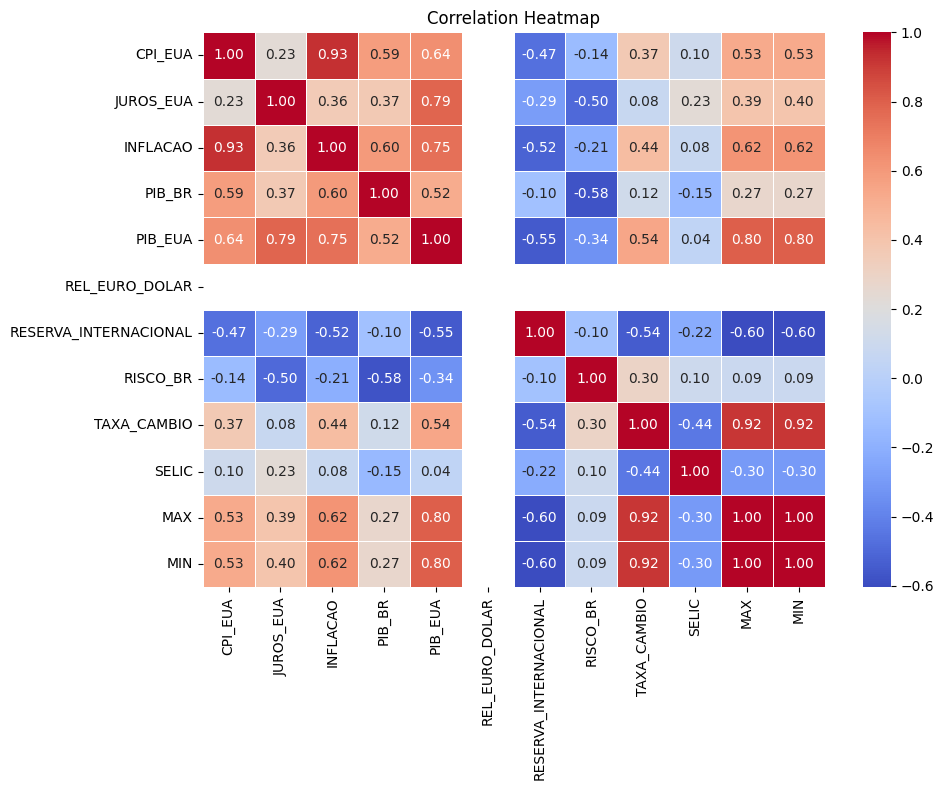

In [137]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [162]:
df = df.drop(columns=["REL_EURO_DOLAR", "RESERVA_INTERNACIONAL", "RISCO_BR"])

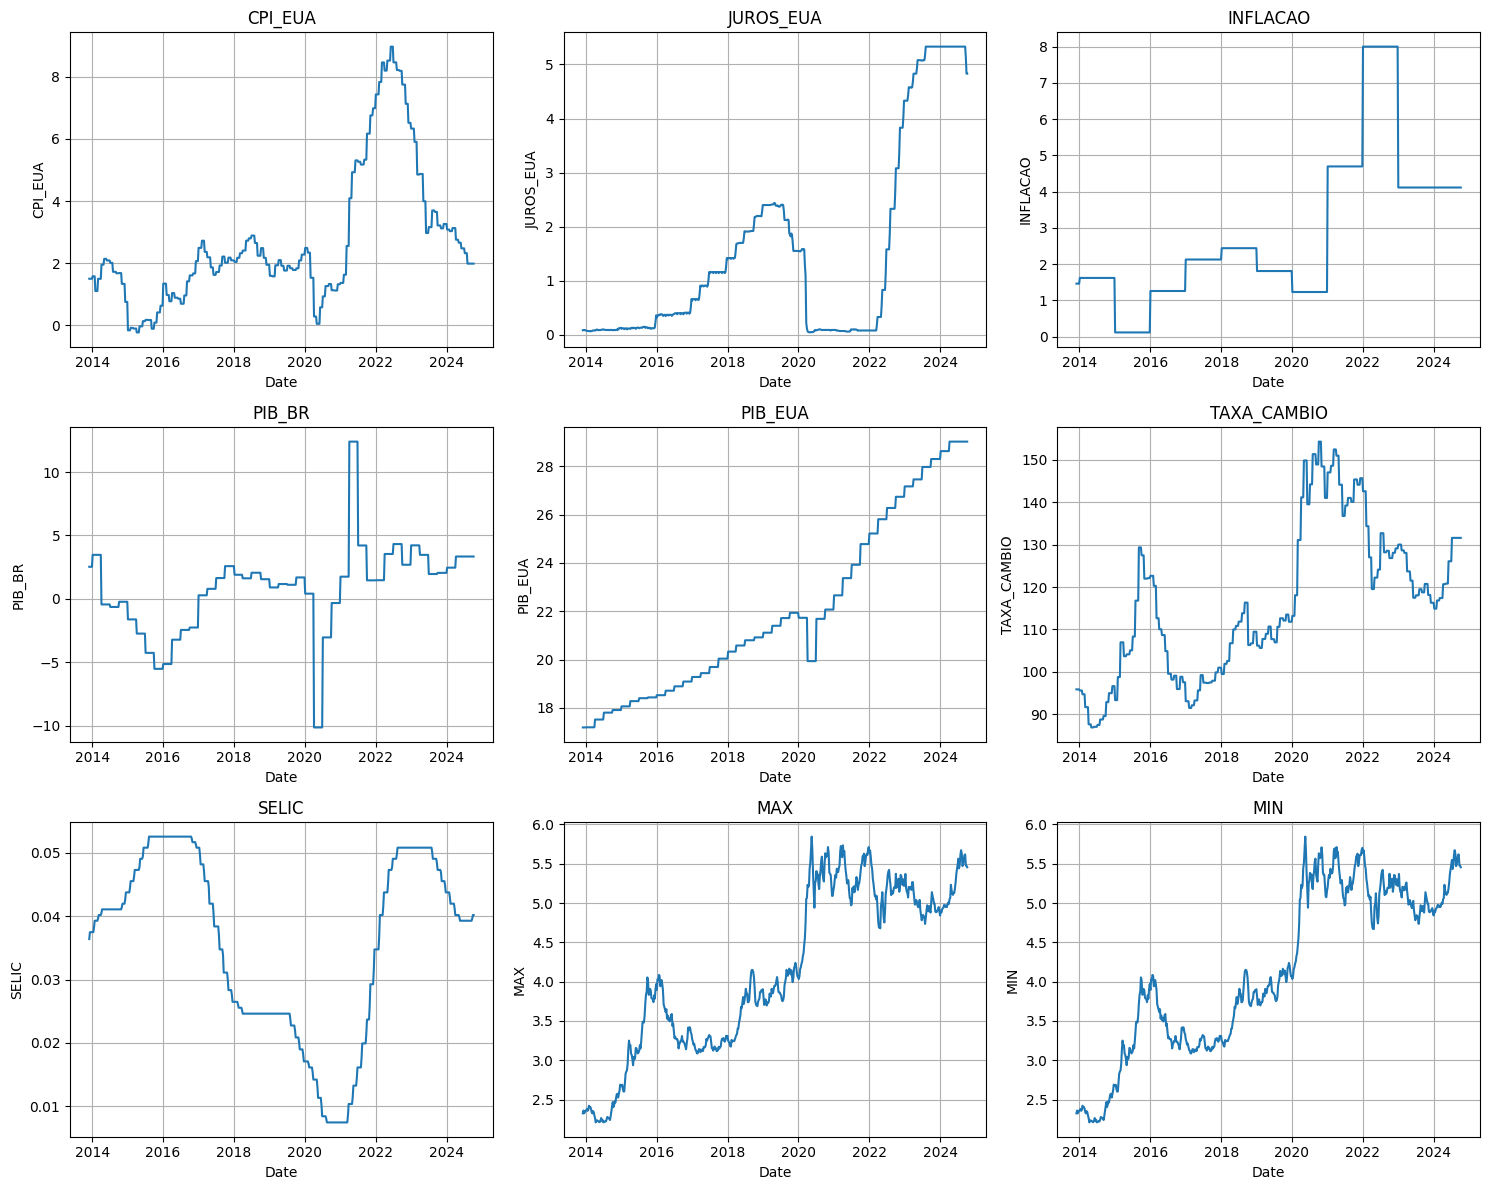

In [164]:
# Create subplots for different columns
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Plotting each column in a separate subplot
# columns = 
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    ax.plot(df.index, df[col])
    ax.set_title(col)
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.grid(True)

plt.tight_layout()
plt.show()


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and targets
X = df.drop(columns=['MAX', 'MIN'])  # Features
y_max = df['MAX']  # Target for MAX
y_min = df['MIN']  # Target for MIN

# Split the data
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)

# Initialize the models
model_max = LinearRegression()
model_min = LinearRegression()

# Train the models
model_max.fit(X_train, y_max_train)
model_min.fit(X_train, y_min_train)

# Predict on the test set
y_max_pred = model_max.predict(X_test)
y_min_pred = model_min.predict(X_test)

# Evaluate the models
mse_max = mean_squared_error(y_max_test, y_max_pred)
r2_max = r2_score(y_max_test, y_max_pred)

mse_min = mean_squared_error(y_min_test, y_min_pred)
r2_min = r2_score(y_min_test, y_min_pred)

print(f"MAX: MSE = {mse_max}, R² = {r2_max}")
print(f"MIN: MSE = {mse_min}, R² = {r2_min}")

MAX: MSE = 0.022666850264181415, R² = 0.9778419906459979
MIN: MSE = 0.022488747894452335, R² = 0.9779190130796289


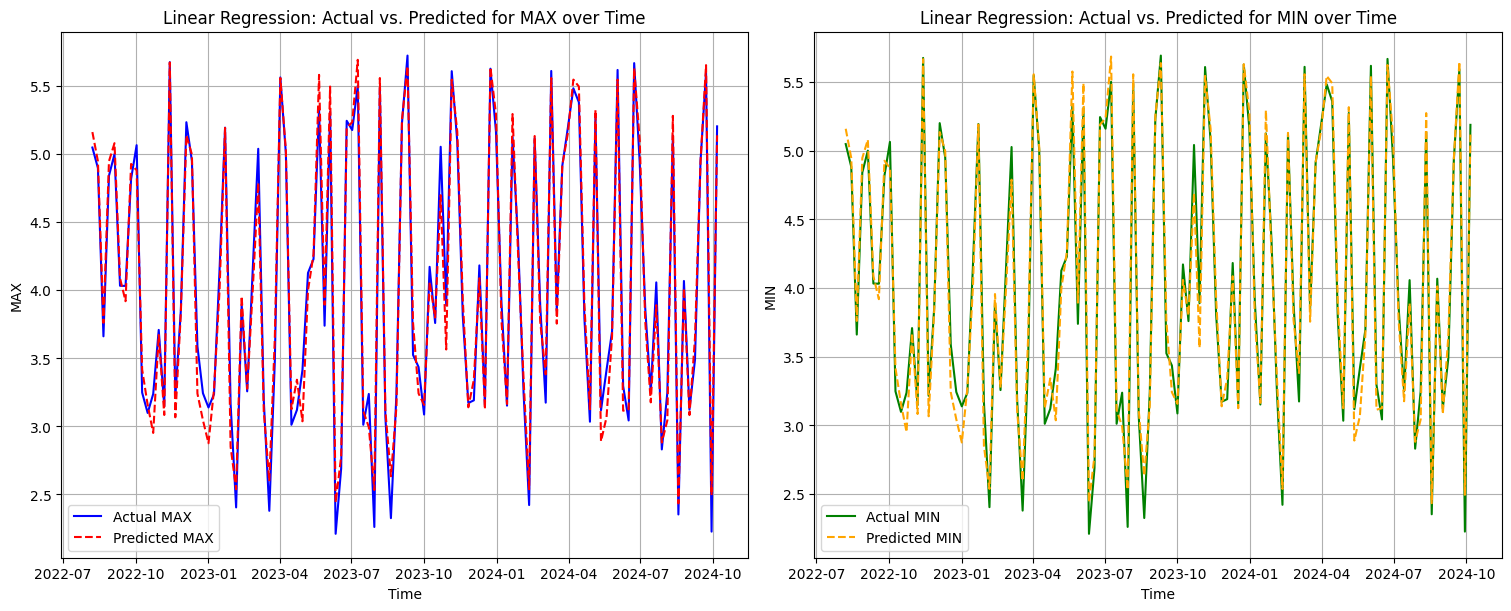

In [166]:
import matplotlib.pyplot as plt

# Create subplots for MAX and MIN
fig, axs = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)

# Plot for MAX (time on x-axis)
axs[0].plot(df.index[-len(y_max_test):], y_max_test, label='Actual MAX', color='blue')
axs[0].plot(df.index[-len(y_max_pred):], y_max_pred, label='Predicted MAX', color='red', linestyle='--')
axs[0].set_title('Linear Regression: Actual vs. Predicted for MAX over Time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('MAX')
axs[0].legend()
axs[0].grid(True)

# Plot for MIN (time on x-axis)
axs[1].plot(df.index[-len(y_min_test):], y_min_test, label='Actual MIN', color='green')
axs[1].plot(df.index[-len(y_min_pred):], y_min_pred, label='Predicted MIN', color='orange', linestyle='--')
axs[1].set_title('Linear Regression: Actual vs. Predicted for MIN over Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('MIN')
axs[1].legend()
axs[1].grid(True)

# Show the plots
plt.show()


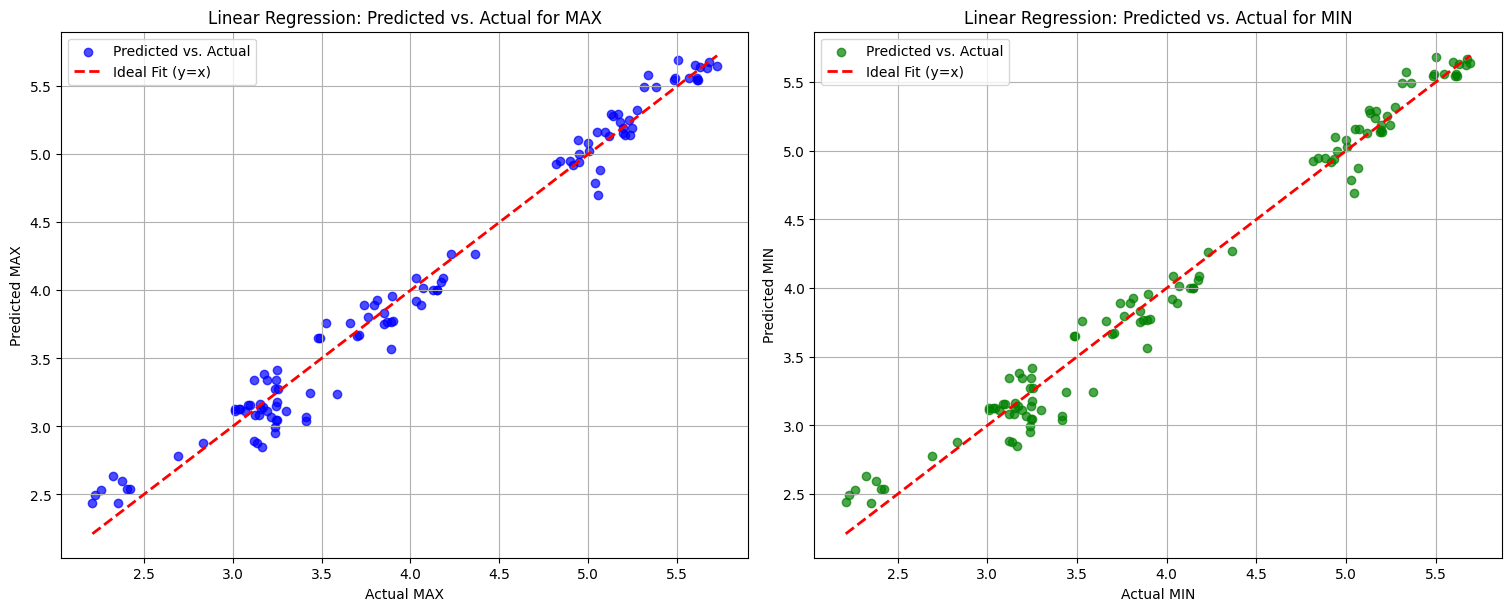

In [167]:
import matplotlib.pyplot as plt

# Create subplots for MAX and MIN
fig, axs = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)

# Plot for MAX
axs[0].scatter(y_max_test, y_max_pred, alpha=0.7, color='blue', label='Predicted vs. Actual')
axs[0].plot([y_max_test.min(), y_max_test.max()], [y_max_test.min(), y_max_test.max()], 'r--', linewidth=2, label='Ideal Fit (y=x)')
axs[0].set_title('Linear Regression: Predicted vs. Actual for MAX')
axs[0].set_xlabel('Actual MAX')
axs[0].set_ylabel('Predicted MAX')
axs[0].legend()
axs[0].grid(True)

# Plot for MIN
axs[1].scatter(y_min_test, y_min_pred, alpha=0.7, color='green', label='Predicted vs. Actual')
axs[1].plot([y_min_test.min(), y_min_test.max()], [y_min_test.min(), y_min_test.max()], 'r--', linewidth=2, label='Ideal Fit (y=x)')
axs[1].set_title('Linear Regression: Predicted vs. Actual for MIN')
axs[1].set_xlabel('Actual MIN')
axs[1].set_ylabel('Predicted MIN')
axs[1].legend()
axs[1].grid(True)

# Show the plots
plt.show()

In [191]:
today_values = {
    'CPI_EUA': 2.6,             # Replace with today's CPI_EUA value
    'JUROS_EUA': 7,          # Replace with today's JUROS_EUA value
    'INFLACAO': 4.2,            # Replace with today's INFLACAO value
    'PIB_BR': 3.0,              # Replace with today's PIB_BR value
    'PIB_EUA': 29.35,             # Replace with today's PIB_EUA value
    'TAXA_CAMBIO': 6.05,         # Replace with today's TAXA_CAMBIO value
    'SELIC': 0.13,             # Replace with today's SELIC value
}

# Convert today's values into a DataFrame
today_df = pd.DataFrame([today_values])

# Make predictions using the trained models (model_max and model_min)
max_pred = model_max.predict(today_df)[0]  # Predict MAX
min_pred = model_min.predict(today_df)[0]  # Predict MIN

print(f"Predicted MAX for today: {max_pred}")
print(f"Predicted MIN for today: {min_pred}")

Predicted MAX for today: 0.49558340856116834
Predicted MIN for today: 0.49991823211239517
